notes for myself:

- first do a setup of the initial method,
- then can start to edit files and improve documentation!





notes for showing to faith: 

    required files in demo_data:
        dream3.txt -> a file containing Protein Protein Interactions
        dream3_clusters.json -> a file containing clusters of proteins
        dream3_go_results.tsv -> file containing the GO terms corresponding to each protein in dream3

    other files in demo_data: (generated with notebook!)
        background_proteinlist is created via the function `print_protein_background_to_file`
        term mapping
        querylsits
        




Make sure to run the notebook in the correct python environment, with the correct pacakges installed!
I am currenlty using my python enviroment 'diamonds' which runs python 3.10.4
TODO: don't know what packages i have installed oops
TODO: make a recipe python environment

import libraries and functions!

In [1]:
# importing libraries

# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# library used for functional enrichment analysis
from func_e.FUNC_E import FUNC_E  # a method that can do funtional enrichment analysis!
import func_e.vocabs.all as vocabs

In [2]:
# following code is necessary as some functions used in the funcE class produce future warnings but i can't fix it as it is not my code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# importing the custom classes i built
from matrix_class import ProteinMatrix # ppi matrix 
from cluster_class import AllClusters # dictionary to hold all clusters (in form number of cluster : list of proteins in that cluster)
from degreelist_class import DegreeList # creates a list of all proteins in order of their degree

In [4]:
# helper functions for setting up program
from recipe_utils import initialize_matrix_clusters_degreelist
from recipe_utils import find_clusters_and_proteins_together

# helper functions for functional enrichment
from recipe_utils import print_querylist_of_clusters_to_file
from recipe_utils import print_protein_background_to_file
from recipe_utils import create_term_mapping_list
from recipe_utils import get_initialized_fe

setup the initial clusters!

In [5]:
matrix, clusters, degreelist = initialize_matrix_clusters_degreelist("demo_data/dream3.txt", "demo_data/dream3_clusters.json")

use recipe!

In [14]:
# run ReCIPE using sqrt method!!!!!!!!!!!!

qualifying_clusters, qualifying_proteins = find_clusters_and_proteins_together(matrix, clusters, degreelist, cluster_ratio=0, cluster_constant=0,use_sqrt=True, protein_ratio=1, protein_constant=0)

# the above function takes in parameters and finds clusters that qualify to be reconnected, then for each of these clusters, it find the proteins that could reconnect them (based on the inputted criteria)

In [15]:
# can peek at which clusters will be updated, and with which proteins
print(qualifying_proteins)

{10: ['NOTCH1'], 11: ['PRKACA'], 20: ['CHEK1', 'ATM'], 25: ['SRC'], 26: ['PRKACA'], 27: ['ATM'], 28: ['TGFBR2'], 32: ['CSNK2B', 'CSNK2A1'], 33: ['ATM'], 38: ['PIK3R1'], 39: ['SRC'], 41: ['EGFR', 'PRKCA'], 42: ['PRKCA'], 47: ['MAPK8'], 49: ['SRC'], 61: ['GSK3B'], 65: ['CSNK2A1', 'SRC'], 74: ['STAT3', 'AKT1', 'PRKCA'], 78: ['SRC'], 79: ['SMAD3'], 85: ['MAPK1'], 87: ['CSNK2A1'], 89: ['TP53'], 91: ['MAP3K5'], 98: ['CDK1'], 106: ['PRKACA'], 107: ['EGFR', 'SRC'], 110: ['PRKACA'], 114: ['MAPK1'], 117: ['CSNK2A1'], 118: ['PRKACA'], 119: ['AKT1'], 122: ['MAPK1'], 123: ['MAPK14', 'MAPK1'], 137: ['CSNK2A1'], 138: ['MAPK1'], 146: ['PPP1CA', 'CTNNB1', 'SRC'], 149: ['GSK3B', 'CDK1'], 152: ['CSNK2A1'], 156: ['CAMK2A'], 158: ['CDK1', 'SRC'], 160: ['AKT1'], 161: ['CSNK2A1'], 170: ['AKT1'], 172: ['FANCD2', 'ATM', 'CDK2', 'CSNK2A1', 'PRKCA'], 175: ['CDK1'], 183: ['CSNK1A1'], 185: ['TSC1', 'IKBKB'], 189: ['SRC'], 193: ['KPNA2', 'MDM2', 'TP53', 'MAPK3'], 194: ['SRC'], 198: ['MAPK3', 'MAPK1']}


Do functional enrichment on the updated clusters!

In [18]:
# use functions to print info to files: (annoying, but need to get info into format used for funcE package)


# 1) a background protein list to be used for functional enrichment analysis
background_proteins_filepath = "demo_data/background_proteinlist.txt"
print_protein_background_to_file(matrix, background_proteins_filepath) 

# 2) file containing protein to go term
term_mapping_filepath = "demo_data/term_mapping.txt"
create_term_mapping_list("demo_data/dream3_go_results.tsv", term_mapping_filepath)

# 3) not a file, but need to establish a background of all GO terms! (to be used for functional enrichment analysis)
background_go_terms = vocabs.getTerms(['GO'])

In [19]:
# continue printing info to files to be used in functional enrichment analysis:

# 4) print original clusters to a file
og_query_filepath = 'demo_data/og_query.txt'
print_querylist_of_clusters_to_file(clusters, clusters.get_all_cluster_labels(),og_query_filepath)

# 5) print updated clusters to a file (just append the function to include the dictionary of qualifying proteins)
updated_query_filepath = 'demo_data/updated_query.txt'
print_querylist_of_clusters_to_file(clusters, clusters.get_all_cluster_labels(), updated_query_filepath, qualifying_proteins)

get_all_cluster_labels fxn has not been tested
get_all_cluster_labels fxn has not been tested


In [20]:
# do functional enrichment on the original clusters!!

original_fe = get_initialized_fe(background_proteins_filepath, term_mapping_filepath, termlist = background_go_terms)

original_fe.importFiles({'query': og_query_filepath })
original_fe.run(cluster=False)

In [21]:
# do functional enrichment on updated clusters!!

updated_fe_all_proteins = get_initialized_fe(background_proteins_filepath, term_mapping_filepath, termlist = background_go_terms)

updated_fe_all_proteins.importFiles({'query': updated_query_filepath })
updated_fe_all_proteins.run(cluster=False)

In [ ]:
# option to only add 1 protein!!!

# create a dictionary containing only the first qualifying protein, and pass it to the querylist
one_qualifying_protein = dict()
for key in qualifying_proteins:
    one_qualifying_protein[key] = [qualifying_proteins[key][0]]


updated_query_one_protein = 'updated_query_1p.txt'
print_querylist_of_clusters_to_file(clusters, clusters.get_all_cluster_labels(), updated_query_one_protein, one_qualifying_protein)

# run functional enrichment for 1 protein added
updated_fe_one_protein = get_initialized_fe(background_proteins_filepath, term_mapping_filepath, termlist = background_go_terms)
updated_fe_one_protein.importFiles({'query': updated_query_one_protein })
updated_fe_one_protein.run(cluster=False)

In [23]:
# print data by the numbers!
print(f"number of clusters that were updated with proteins: {len(qualifying_proteins.keys())}\n")

# clusters that are functionally enriched
print(f"number of functionally enriched clusters (modules) out of {len(qualifying_proteins.keys())} original clusters: {original_fe.enrichment['Module'].nunique()}")
print(f"number of functionally enriched clusters after addition of all proteins: {updated_fe_all_proteins.enrichment['Module'].nunique()}")

print(f"")


# significant P-values!!!
print(f"number of significant pvals in original clusters before updating: {original_fe.enrichment['Fishers_pvalue'].count()}")
print(f"number of significant pvals in clusters with all proteins added: {updated_fe_all_proteins.enrichment['Fishers_pvalue'].count()}")

number of clusters that were updated with proteins: 52

number of functionally enriched clusters (modules) out of 52 original clusters: 155
number of functionally enriched clusters after addition of all proteins: 163

number of significant pvals in original clusters before updating: 405
number of significant pvals in clusters with all proteins added: 479


[155, 163]


/var/folders/hk/q40rrztn3glcl0jvwjcpzyth0000gn/T/ipykernel_24153/872751826.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, fontsize=14)


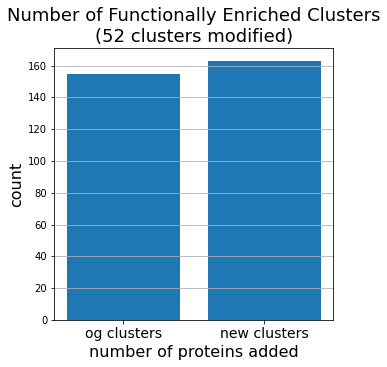

In [27]:
# create clusters graph
fig, ax = plt.subplots()

x_values = ["og clusters", "new clusters"]
counts = [original_fe.enrichment['Module'].nunique(), updated_fe_all_proteins.enrichment['Module'].nunique()]
print(counts)


ax.bar(x_values, counts)

ax.set_xticklabels(x_values, fontsize=14)

ax.set_title(f"Number of Functionally Enriched Clusters\n({len(qualifying_proteins.keys())} clusters modified)", fontsize=18)
ax.set_ylabel('count', fontsize=16)

ax.set_xlabel('number of proteins added', fontsize=16)

ax.grid(axis='y')

fig.set_size_inches(5,5)
plt.show()